In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv('hotel_bookings.csv')

In [3]:
data['children'] = data['children'].fillna(0)

In [4]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [5]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [6]:
data["is_family"] = data.apply(family, axis = 1)
data["total_customer"] = data["adults"] + data["children"] + data["babies"]

In [7]:
data = data.drop(columns = ['adults', 'babies', 'children', 'reservation_status_date', 'reservation_status', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month'])

In [8]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer
0,0,0,342,7,0,0,BB,PRT,Direct,Direct,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,0,2.0
1,0,0,737,7,0,0,BB,PRT,Direct,Direct,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,0,2.0
2,0,0,7,7,0,1,BB,GBR,Direct,Direct,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,0,1.0
3,0,0,13,7,0,1,BB,GBR,Corporate,Corporate,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,0,1.0
4,0,0,14,7,0,2,BB,GBR,Online TA,TA/TO,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,0,2.0


In [9]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
stays_in_weekend_nights                0
stays_in_week_nights                   0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
is_family       

In [10]:
#drop null rows for column "Country"
data.dropna(subset=['country'],inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  int64  
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_month              118902 non-null  int64  
 4   stays_in_weekend_nights         118902 non-null  int64  
 5   stays_in_week_nights            118902 non-null  int64  
 6   meal                            118902 non-null  object 
 7   country                         118902 non-null  object 
 8   market_segment                  118902 non-null  object 
 9   distribution_channel            118902 non-null  object 
 10  is_repeated_guest               118902 non-null  int64  
 11  previous_cancellations          118902 non-null  int64  
 12  previous_booking

In [12]:
#columns to encode

# to_encode = ["deposit_type", "customer_type", "hotel" , "meal", 'country','market_segment',"distribution_channel",'assigned_room_type', 'reserved_room_type', "arrival_date_month"]
to_encode = ["meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]

for column in data.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(data[column].astype(str))
        data[column]=le.transform(data[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)

{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
{'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9, 'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BOL': 24, 'BRA': 25, 'BRB': 26, 'BWA': 27, 'CAF': 28, 'CHE': 29, 'CHL': 30, 'CHN': 31, 'CIV': 32, 'CMR': 33, 'CN': 34, 'COL': 35, 'COM': 36, 'CPV': 37, 'CRI': 38, 'CUB': 39, 'CYM': 40, 'CYP': 41, 'CZE': 42, 'DEU': 43, 'DJI': 44, 'DMA': 45, 'DNK': 46, 'DOM': 47, 'DZA': 48, 'ECU': 49, 'EGY': 50, 'ESP': 51, 'EST': 52, 'ETH': 53, 'FIN': 54, 'FJI': 55, 'FRA': 56, 'FRO': 57, 'GAB': 58, 'GBR': 59, 'GEO': 60, 'GGY': 61, 'GHA': 62, 'GIB': 63, 'GLP': 64, 'GNB': 65, 'GRC': 66, 'GTM': 67, 'GUY': 68, 'HKG': 69, 'HND': 70, 'HRV': 71, 'HUN': 72, 'IDN': 73, 'IMN': 74, 'IND': 75, 'IRL': 76, 'IRN': 77, 'IRQ': 78, 'ISL': 79, 'ISR': 80, 'ITA': 81, 'JAM': 82, 'JEY': 83, 'JOR': 84, 'JPN': 85, 'KAZ': 86, 

In [13]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer
0,0,0,342,7,0,0,0,135,3,1,...,0,NaN,NaN,0,2,0.0,0,0,0,2.0
1,0,0,737,7,0,0,0,135,3,1,...,0,NaN,NaN,0,2,0.0,0,0,0,2.0
2,0,0,7,7,0,1,0,59,3,1,...,0,NaN,NaN,0,2,75.0,0,0,0,1.0
3,0,0,13,7,0,1,0,59,2,0,...,0,304.0,NaN,0,2,75.0,0,0,0,1.0
4,0,0,14,7,0,2,0,59,6,3,...,0,240.0,NaN,0,2,98.0,0,1,0,2.0


In [14]:
#encoding both agent and company code

data['agent_encoded'] = data['agent'].notnull()
data['company_encoded'] = data['company'].notnull()
data["agent_encoded"] = data["agent_encoded"].astype(int)
data["company_encoded"] = data["company_encoded"].astype(int)
data=data.drop(['agent','company'],axis = 1)

<AxesSubplot:>

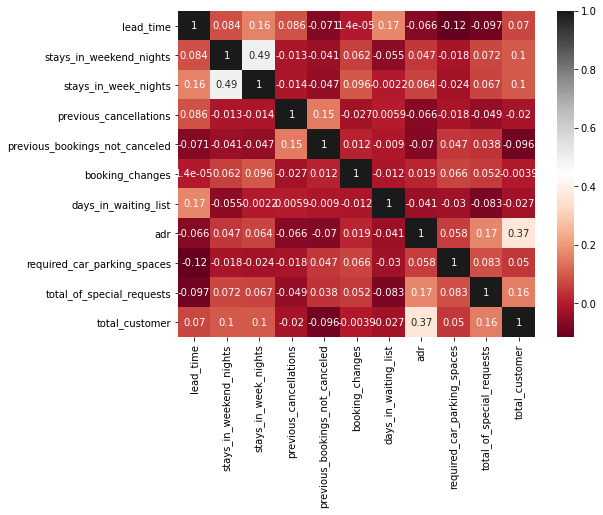

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(data[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'previous_cancellations', 'previous_bookings_not_canceled',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                    'total_of_special_requests', 'total_customer']].corr(), annot=True, cmap = 'RdGy')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  int64  
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_month              118902 non-null  int64  
 4   stays_in_weekend_nights         118902 non-null  int64  
 5   stays_in_week_nights            118902 non-null  int64  
 6   meal                            118902 non-null  int32  
 7   country                         118902 non-null  int32  
 8   market_segment                  118902 non-null  int32  
 9   distribution_channel            118902 non-null  int32  
 10  is_repeated_guest               118902 non-null  int64  
 11  previous_cancellations          118902 non-null  int64  
 12  previous_booking

In [50]:
# features
X = data.drop(["is_canceled"], axis=1)

# target
y = data['is_canceled']

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  int64  
 1   lead_time                       118902 non-null  int64  
 2   arrival_date_month              118902 non-null  int64  
 3   stays_in_weekend_nights         118902 non-null  int64  
 4   stays_in_week_nights            118902 non-null  int64  
 5   meal                            118902 non-null  int32  
 6   market_segment                  118902 non-null  int32  
 7   distribution_channel            118902 non-null  int32  
 8   is_repeated_guest               118902 non-null  int64  
 9   previous_cancellations          118902 non-null  int64  
 10  previous_bookings_not_canceled  118902 non-null  int64  
 11  reserved_room_type              118902 non-null  int32  
 12  assigned_room_ty

### Train Test Split without Scaling and PCA

In [52]:
from sklearn.model_selection import train_test_split
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, precision_score, f1_score, recall_score, classification_report

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, matthews_corrcoef
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.preprocessing import RobustScaler, StandardScaler

from numpy import argmax
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
import itertools

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

In [43]:
from sklearn.inspection import permutation_importance

def results(balancing_technique):
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    model_name = ["RF"]
    RFC = RandomForestClassifier(random_state = 0, max_depth = None, min_samples_split = 2, n_estimators = 100)
#     RFC2 = RandomForestClassifier(random_state = 0, max_depth = 13, min_samples_split = 2, n_estimators = 500)
#     XGBC = XGBClassifier(colsample_bytree=1.0, gamma=2,max_depth=5, min_child_weight=1,subsample=0.8)
#     LGBC = LGBMClassifier(random_state = 0)
#     LRC = LogisticRegression(random_state = 0, solver = 'lbfgs', max_iter = 1000)
#     DTC = DecisionTreeClassifier(random_state = 0)
#     models = []
#     models.append(('1', RFC))
#     models.append(('2', XGBC))
#     ENS = VotingClassifier(models, voting = 'soft')

    for clf,i in zip([RFC], model_name):
        model = clf.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
#         perm_importance = permutation_importance(model, X_test, y_test)
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        print("ROC_AUC_score proba : %.6f" % (roc_auc_score(y_test, y_pred_prob)))
        #Confusion Matrix
        print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print()
#         print("precision =", precision_score(y_test, y_pred))
#         print("recall =", recall_score(y_test, y_pred))
#         print("MCC =", matthews_corrcoef(y_test, y_pred))
        print("standard f1 score =", f1_score(y_test, y_pred))
        print()
        
         #precision-recall curve
        precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
        avg_pre = average_precision_score(y_test, y_pred_prob)
        ax1.plot(recall, precision, label = i+ " average precision = {:0.3f}".format(avg_pre), lw = 3, alpha = 0.7)
        ax1.set_xlabel('Recall', fontsize = 14)
        ax1.set_ylabel('Precision', fontsize = 14)
        ax1.set_title('Precision-Recall Curve', fontsize = 18)
        ax1.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(recall[close_default], precision[close_default], 'o', markersize = 8)

        #roc-curve
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = i+ " area = {:0.3f}".format(roc_auc), lw = 3, alpha = 0.7)
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()
        
#         sorted_idx = perm_importance.importances_mean.argsort()
#         plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
#         plt.xlabel("Permutation Importance")

ens
######################### RF #########################
Training Accuracy = 0.991
Test Accuracy = 0.865
ROC_AUC_score : 0.845699
ROC_AUC_score proba : 0.931441
       0     1
0  13733  1171
1   2042  6835
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8096902209322987

######################### RF2 #########################
Training Accuracy = 0.833
Test Accuracy = 0.828
ROC_AUC_score : 0.787729
ROC_AUC_score proba : 0.906727
       0     1
0  14097   807
1   3288  5589
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7318797878609312

######################### XGB #########################
Training Accuracy = 0.851
Test Accuracy = 0.841
ROC_AUC_score : 0.813406
ROC_AUC_score proba : 0.912357
       0     1
0  13761  1143
1   2632  6245
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7679065478020289



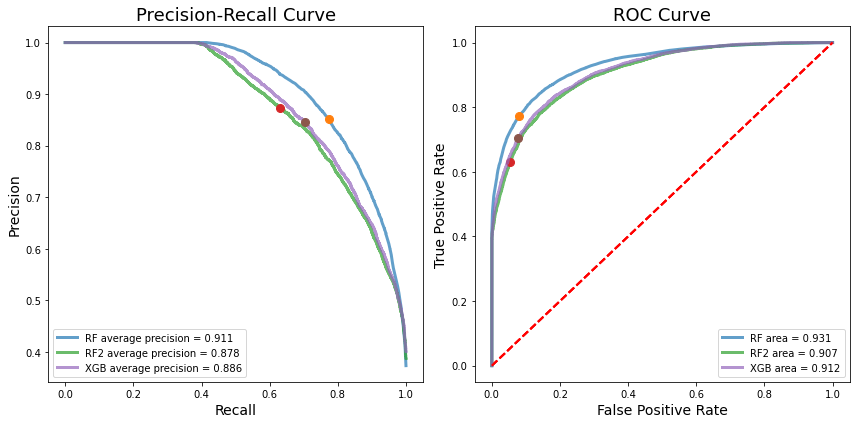

In [53]:
results("ens")

Text(0.5, 0, 'Permutation Importance')

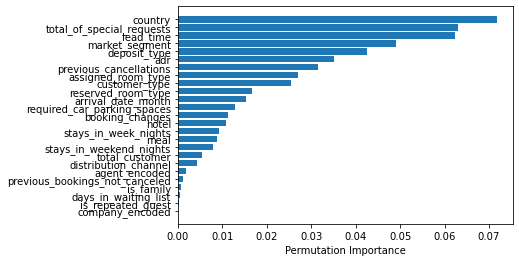

In [31]:
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]
perm_importance = permutation_importance(model, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

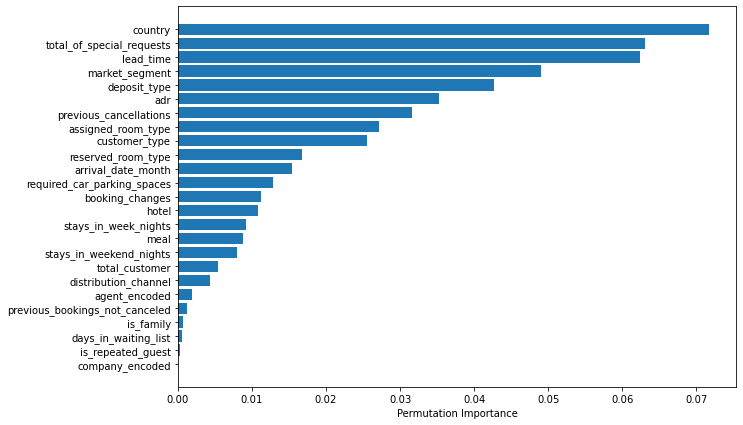

In [49]:
plt.figure(figsize=(10,7))
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

rf


KeyboardInterrupt: 

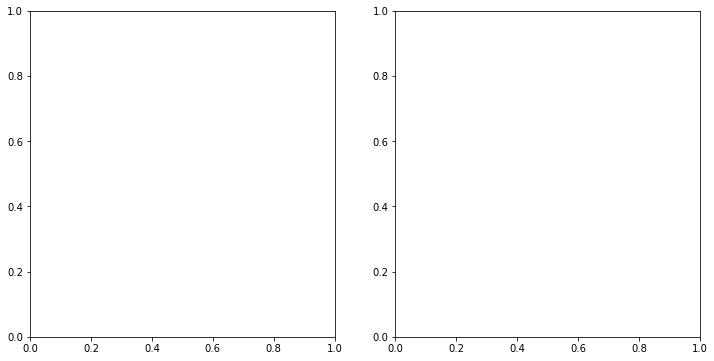

In [29]:
results("rf")

Preliminary
######################### RF #########################
Training Accuracy = 0.996
Test Accuracy = 0.887
ROC_AUC_score : 0.871353
       0     1
0  13900  1004
1   1686  7191
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8424320524835989

######################### XGB #########################
Training Accuracy = 0.883
Test Accuracy = 0.869
ROC_AUC_score : 0.853009
       0     1
0  13647  1257
1   1861  7016
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8181924198250728

######################### LGBM #########################
Training Accuracy = 0.867
Test Accuracy = 0.864
ROC_AUC_score : 0.845621
       0     1
0  13682  1222
1   2013  6864
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8092908094087131



C:\Users\Maurice\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


######################### LR #########################
Training Accuracy = 0.794
Test Accuracy = 0.795
ROC_AUC_score : 0.752354
       0     1
0  13699  1205
1   3679  5198
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.6803664921465968



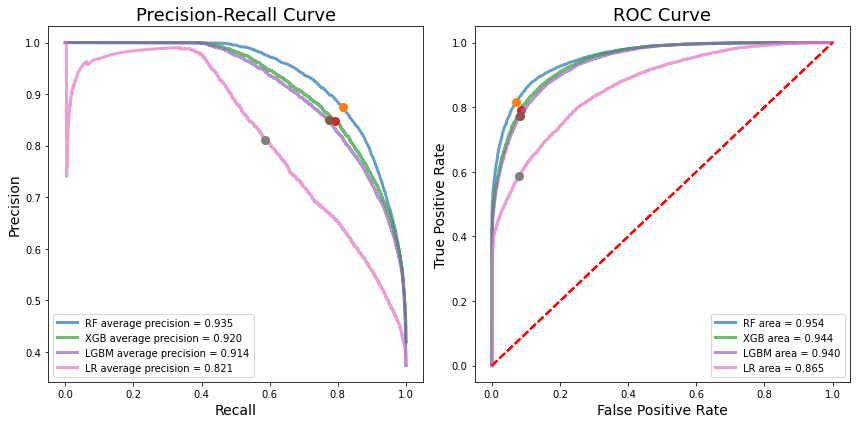

In [143]:
results("Preliminary")

### Additional data splits with Scaling and PCA below, might want to repeat model with scaled and pca data if it makes sense for the model to see if accuracy improves

### Scaling

In [99]:
# create copy of DF for scaling
X_scaled = X.copy()

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  int64  
 1   lead_time                       118902 non-null  int64  
 2   arrival_date_month              118902 non-null  int64  
 3   stays_in_weekend_nights         118902 non-null  int64  
 4   stays_in_week_nights            118902 non-null  int64  
 5   meal                            118902 non-null  int32  
 6   market_segment                  118902 non-null  int32  
 7   distribution_channel            118902 non-null  int32  
 8   is_repeated_guest               118902 non-null  int64  
 9   previous_cancellations          118902 non-null  int64  
 10  previous_bookings_not_canceled  118902 non-null  int64  
 11  reserved_room_type              118902 non-null  int32  
 12  assigned_room_ty

In [101]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'previous_cancellations', 'previous_bookings_not_canceled',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                    'total_of_special_requests', 'total_customer']

remaining_columns = [x for x in X_scaled.columns if x not in columns_to_scale]


# Scale columns
scaler = StandardScaler()

X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale]) # to learn mean and standard dev to be used for scaling


In [102]:
# Train Test Split with Scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=420)

In [152]:
X_train.head()

,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,agent_encoded,company_encoded
100765,1,0.464834,10,0.071380,-1.316805,0,43,6,3,0,...,0,-0.132199,2,-0.455779,-0.253445,1.801866,1,1.426051,1,0
77377,1,-0.797997,10,-0.932428,0.262012,0,135,5,3,1,...,1,-0.132199,2,-0.237702,-0.253445,-0.721236,0,0.040788,1,0
115120,1,0.202913,6,-0.932428,1.314557,0,123,3,1,0,...,0,-0.132199,2,-0.098656,-0.253445,1.801866,0,0.040788,1,0
36368,0,0.006473,5,1.075187,0.262012,0,34,6,3,0,...,0,-0.132199,2,-0.610473,3.842106,0.540315,0,0.040788,1,0
110843,1,0.333874,4,1.075187,-0.264260,0,56,5,3,0,...,0,-0.132199,3,0.554585,-0.253445,0.540315,0,0.040788,1,0


In [102]:
results("test")

test
######################### RF #########################
Training Accuracy = 0.991
Test Accuracy = 0.865
ROC_AUC_score : 0.845981
ROC_AUC_score proba : 0.931473
       0     1
0  13733  1171
1   2037  6840
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8100426338228327



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Maurice\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-103-ec9654ba63aa>", line 1, in <module>
    results("test")
  File "<ipython-input-43-61d66d2cf240>", line 19, in results
    model = clf.fit(X_train, y_train.values.ravel())
  File "C:\Users\Maurice\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Maurice\anaconda3\lib\site-packages\joblib\parallel.py", line 1051, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\Maurice\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Maurice\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\U

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x000001369C5838B0> (for post_execute):



KeyboardInterrupt



After scaling
######################### RF #########################
Training Accuracy = 0.996
Test Accuracy = 0.887
ROC_AUC_score : 0.871387
       0     1
0  13901  1003
1   1686  7191
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8424814012067249

######################### XGB #########################
Training Accuracy = 0.883
Test Accuracy = 0.869
ROC_AUC_score : 0.853009
       0     1
0  13647  1257
1   1861  7016
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8181924198250728

######################### LGBM #########################
Training Accuracy = 0.868
Test Accuracy = 0.864
ROC_AUC_score : 0.845917
       0     1
0  13669  1235
1   2000  6877
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.8095826711401495



C:\Users\Maurice\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


######################### LR #########################
Training Accuracy = 0.793
Test Accuracy = 0.794
ROC_AUC_score : 0.752197
       0     1
0  13696  1208
1   3680  5197
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.6801465776730795



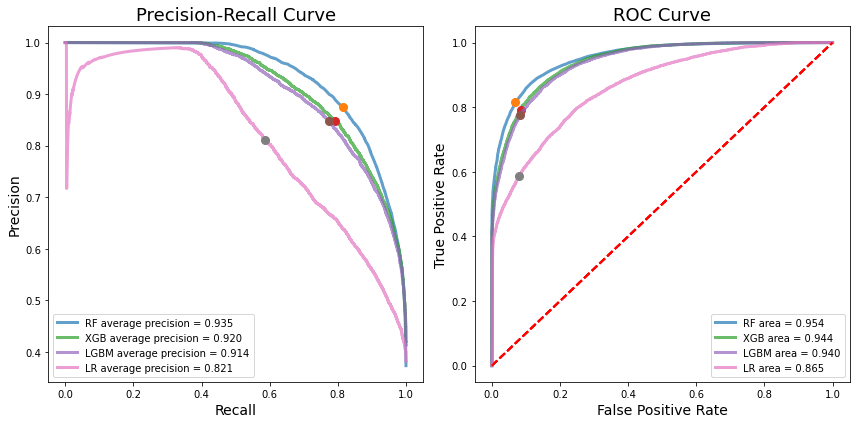

In [151]:
results("After scaling")

### PCA

In [104]:
X_pca = X.copy()

In [105]:
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  int64  
 1   lead_time                       118902 non-null  int64  
 2   arrival_date_month              118902 non-null  int64  
 3   stays_in_weekend_nights         118902 non-null  int64  
 4   stays_in_week_nights            118902 non-null  int64  
 5   meal                            118902 non-null  int32  
 6   market_segment                  118902 non-null  int32  
 7   distribution_channel            118902 non-null  int32  
 8   is_repeated_guest               118902 non-null  int64  
 9   previous_cancellations          118902 non-null  int64  
 10  previous_bookings_not_canceled  118902 non-null  int64  
 11  reserved_room_type              118902 non-null  int32  
 12  assigned_room_ty

In [106]:
from sklearn.decomposition import PCA

# X_pca.drop('date', axis=1, inplace=True)

for i in range(1,24):
    pca = PCA(n_components=i, random_state=420)
    components = pca.fit_transform(X_pca)
    print(i)
    print('explained var ratio', pca.explained_variance_ratio_)
    print('sum', sum(pca.explained_variance_ratio_))
    print()

1
explained var ratio [0.79988724]
sum 0.7998872377018954

2
explained var ratio [0.79988724 0.1771068 ]
sum 0.9769940423844663

3
explained var ratio [0.79988724 0.1771068  0.02104448]
sum 0.9980385213396886

4
explained var ratio [7.99887238e-01 1.77106805e-01 2.10444790e-02 6.49655849e-04]
sum 0.9986881771882717

5
explained var ratio [7.99887238e-01 1.77106805e-01 2.10444790e-02 6.49655849e-04
 3.81961957e-04]
sum 0.9990701391448489

6
explained var ratio [7.99887238e-01 1.77106805e-01 2.10444790e-02 6.49655849e-04
 3.81961957e-04 2.52557517e-04]
sum 0.999322696661969

7
explained var ratio [7.99887238e-01 1.77106805e-01 2.10444790e-02 6.49655849e-04
 3.81961957e-04 2.52557517e-04 1.76720210e-04]
sum 0.9994994168716929

8
explained var ratio [7.99887238e-01 1.77106805e-01 2.10444790e-02 6.49655849e-04
 3.81961957e-04 2.52557517e-04 1.76720210e-04 1.26937941e-04]
sum 0.999626354812551

9
explained var ratio [7.99887238e-01 1.77106805e-01 2.10444790e-02 6.49655849e-04
 3.81961957e-04

In [107]:
# 11 randomly chosen, might want to change number of principle components
n = 11 
pca = PCA(n_components=n, random_state=69)
pca_components = pca.fit_transform(X_pca)
print('explained var ratio', pca.explained_variance_ratio_)
print('sum', sum(pca.explained_variance_ratio_))

columns = []
for i in range(n):
    x = "pc" + str(i)
    columns.append(x)

# convert numpy array to dataframe
X_pca = pd.DataFrame(pca_components, columns=columns)
X_pca

explained var ratio [7.99887238e-01 1.77106805e-01 2.10444790e-02 6.49655849e-04
 3.81961957e-04 2.52557517e-04 1.76720210e-04 1.26937941e-04
 7.52018462e-05 4.84973888e-05 4.80392554e-05]
sum 0.9997980933029819


,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,241.423122,-92.215085,-10.294182,-0.030867,-2.130683,-4.514037,0.330740,-1.407695,-0.508698,-0.544184,-0.250901
1,635.929255,-76.170878,-21.514724,1.532477,-2.634676,-6.215173,0.590593,-1.379729,-0.815952,-1.085811,-0.413332
2,-96.173304,-30.931578,0.126348,-1.047408,0.464338,-1.776769,1.012419,-1.881076,-0.007063,-0.241392,0.383659
3,-90.175944,-30.713052,-0.035015,-1.076074,1.816406,-1.463281,1.914145,-2.772864,0.040639,-0.061409,0.126130
4,-90.095523,-7.657369,0.196201,-0.870464,1.734183,0.597096,-0.852733,0.658917,0.924378,-0.225971,0.637462
...,...,...,...,...,...,...,...,...,...,...,...
118897,-81.016876,-9.140678,-0.092203,-1.801626,0.437293,3.348180,0.502176,-0.316670,0.876962,0.248634,-0.200855
118898,-7.344753,123.324599,-0.826246,-0.701432,-2.882745,1.333563,0.175866,0.409173,0.705712,-0.057180,-0.273077
118899,-72.528614,52.892853,0.297116,-1.351729,-2.584683,2.160172,-0.223134,0.895068,0.845670,-0.499742,-0.483912
118900,4.542897,2.609364,-2.438855,-1.410265,0.455934,3.181737,0.102585,0.250184,0.949843,0.134385,-0.175693


In [108]:
# Train Test Split with Scaling and PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=420)

test
######################### RF #########################
Training Accuracy = 0.991
Test Accuracy = 0.850
ROC_AUC_score : 0.824687
ROC_AUC_score proba : 0.916543
       0     1
0  13790  1114
1   2449  6428
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7829953103112247

######################### RF2 #########################
Training Accuracy = 0.863
Test Accuracy = 0.829
ROC_AUC_score : 0.789915
ROC_AUC_score proba : 0.898561
       0     1
0  14095   809
1   3248  5629
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.735096310806399

######################### XGB #########################
Training Accuracy = 0.844
Test Accuracy = 0.823
ROC_AUC_score : 0.792235
ROC_AUC_score proba : 0.886918
       0     1
0  13642  1262
1   2937  5940
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7388519186516576



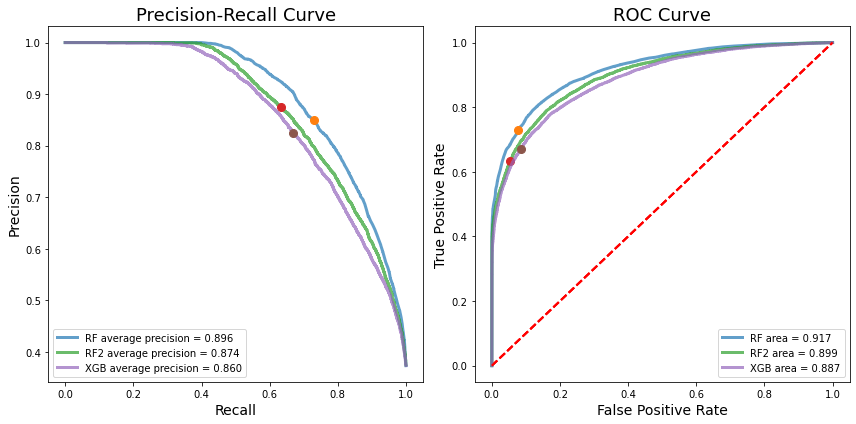

In [109]:
results("test")

After PCA
######################### RF #########################
Training Accuracy = 0.996
Test Accuracy = 0.860
ROC_AUC_score : 0.836414
       0     1
0  13834  1070
1   2267  6610
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7984538261762396

######################### XGB #########################
Training Accuracy = 0.871
Test Accuracy = 0.834
ROC_AUC_score : 0.810711
       0     1
0  13454  1450
1   2497  6380
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7637517208355779

######################### LGBM #########################
Training Accuracy = 0.834
Test Accuracy = 0.823
ROC_AUC_score : 0.794465
       0     1
0  13507  1397
1   2817  6060
--------------- CLASSIFICATION REPORT ---------------

standard f1 score = 0.7420105301824416

######################### LR #########################
Training Accuracy = 0.729
Test Accuracy = 0.732
ROC_AUC_score : 0.689229
       0     1
0  12813  2091
1   4272  4605
----------

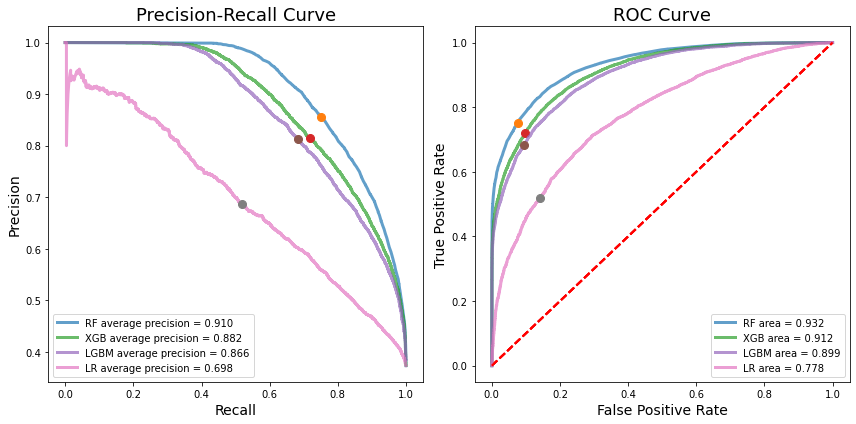

In [160]:
results("After PCA")